In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d
import scipy
import matplotlib as mpl
import sympy as sp
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
from collections import OrderedDict
import pylhe
import glob
import pyslha
import ROOT
import xml.etree.ElementTree as ET


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

Welcome to JupyROOT 6.26/10


In [2]:
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
MZp = np.array([500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 
       1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 
       2700.0, 2800.0, 2900.0, 3000.0])
Mchi = 65.0
# gq = np.array([0.01, 0.1, 0.2, 0.25])
gq = 0.25
# gchi = np.array([0.1, 0.5, 1.0, 2.0])
gchi = 1.0
gqA = 0.0
gZp = 1.0
# gqV = np.array([0.01, 0.1, 0.2, 0.25])
gqV = 0.25
gqA = 0.0
gqL = gqV 
gqR = gqV 

# Zp decays expressions

# zpuu = ((-48*gqA**2*MU**2 + 48*gqA*gqL*gZp*MU**2 - 48*gqA*gqR*gZp*MU**2 
#            - 6*gqL**2*gZp**2*MU**2 + 36*gqL*gqR*gZp**2*MU**2 - 6*gqR**2*gZp**2*MU**2 
#            + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 
#            + 6*gqR**2*gZp**2*MZp**2)*np.sqrt(-4*MU**2*MZp**2 + MZp**4))/(48*np.pi*abs(MZp)**3)

zpcc = ((-48*gqA**2*MC**2 + 24*gq**2*gZp**2*MC**2 + 12*gqA**2*MZp**2 
           + 12*gq**2*gZp**2*MZp**2)*np.sqrt(-4*MC**2*MZp**2 + MZp**4))/(48*np.pi*abs(MZp)**3)
            
zptt = ((-48*gqA**2*MT**2 + 24*gq**2*gZp**2*MT**2 + 12*gqA**2*MZp**2 
            + 12*gq**2*gZp**2*MZp**2)*np.sqrt(-4*MT**2*MZp**2 + MZp**4))/(48*np.pi*abs(MZp)**3)
                      
zpdd = ((-48*gqA**2*MD**2 + 24*gq**2*gZp**2*MD**2 + 12*gqA**2*MZp**2 
            + 12*gq**2*gZp**2*MZp**2)*np.sqrt(-4*MD**2*MZp**2 + MZp**4))/(48*np.pi*abs(MZp)**3)
                        
zpss = ((-48*gqA**2*MS**2 + 24*gq**2*gZp**2*MS**2 + 12*gqA**2*MZp**2 
            + 12*gq**2*gZp**2*MZp**2)*np.sqrt(-4*MS**2*MZp**2 + MZp**4))/(48*np.pi*abs(MZp)**3)
                        
zpbb = ((-48*gqA**2*MB**2 + 24*gq**2*gZp**2*MB**2 + 12*gqA**2*MZp**2 
            + 12*gq**2*gZp**2*MZp**2)*np.sqrt(-4*MB**2*MZp**2 + MZp**4))/(48*np.pi*abs(MZp)**3)
                        

zpchichi = ((-16*gchi**2*Mchi**2 + 4*gchi**2*MZp**2)*np.sqrt(-4*Mchi**2*MZp**2 
                                                                + MZp**4))/(96*np.pi*abs(MZp)**3)
                        

GammaZpChi = zpchichi/(zpcc + zptt + zpdd + zpss + zpbb + zpchichi)


# Sd decays expressions

MSd = np.array([140.0, 150.0, 200.0, 350.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 
                1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 2000.0])

MZp = 5000.0

# MZp = np.array([2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 3000.0, 3000.0, 3000.0, 3000.0, 
#                 3000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0])

gchi = 1.0

MH1 = 125.3
MW = 80.4
MZ = 91.2
vev = 246
xev = MZp/(2*gchi)


ychi = 1.0
yc = np.sqrt(2)*MC/xev
yt = np.sqrt(2)*MT/xev
ydo = np.sqrt(2)*MD/xev
ys = np.sqrt(2)*MS/xev
yup = np.sqrt(2)*MU/xev
yb = np.sqrt(2)*MB/xev

cw = MW/MZ
sw = np.sqrt(1 - cw**2)
ee = (2*MW*sw)/vev
# Sa = np.array([0.1, 0.2])
Sa = 0.1
Ca = np.sqrt(1-Sa**2)


lam1 = (MH1**2 + MSd**2 + (MH1**2 - MSd**2)*(Ca**2 - Sa**2))/(4*vev**2)
lam2 = (gchi**2*(MH1**2 + MSd**2 + (-MH1**2 + MSd**2)*(Ca**2 - Sa**2)))/MZp**2
lam3 = (2*Ca*gchi*(MH1**2 - MSd**2)*Sa)/(MZp*vev)

sdhh = ((36*Ca**4*lam1**2*Sa**2*vev**2 - 24*Ca**4*lam1*lam3*Sa**2*vev**2 + 4*Ca**4*lam3**2*Sa**2*vev**2 
         + 12*Ca**2*lam1*lam3*Sa**4*vev**2 - 4*Ca**2*lam3**2*Sa**4*vev**2 + lam3**2*Sa**6*vev**2 
         + 12*Ca**5*lam1*lam3*Sa*vev*xev - 4*Ca**5*lam3**2*Sa*vev*xev + 72*Ca**3*lam1*lam2*Sa**3*vev*xev 
         - 24*Ca**3*lam1*lam3*Sa**3*vev*xev - 24*Ca**3*lam2*lam3*Sa**3*vev*xev + 10*Ca**3*lam3**2*Sa**3*vev*xev 
         + 12*Ca*lam2*lam3*Sa**5*vev*xev - 4*Ca*lam3**2*Sa**5*vev*xev + Ca**6*lam3**2*xev**2 
         + 12*Ca**4*lam2*lam3*Sa**2*xev**2 - 4*Ca**4*lam3**2*Sa**2*xev**2 + 36*Ca**2*lam2**2*Sa**4*xev**2 
         - 24*Ca**2*lam2*lam3*Sa**4*xev**2 
         + 4*Ca**2*lam3**2*Sa**4*xev**2)*np.sqrt(-4*MH1**2*MSd**2 + MSd**4))/(32*np.pi*abs(MSd)**3)
    
sdcc = (3*np.sqrt((1 - (4*MC**2)/MSd**2)*MSd**4)*(-4*MC**2 + MSd**2)*Sa**2*yc**2)/(16*np.pi*(MSd)**3)
sdtt = (3*(MSd**2 - 4*MT**2)*np.sqrt(MSd**4*(1 - (4*MT**2)/MSd**2))*Sa**2*yt**2)/(16*np.pi*(MSd)**3)
sddd = (3*np.sqrt((1 - (4*MD**2)/MSd**2)*MSd**4)*(-4*MD**2 + MSd**2)*Sa**2*ydo**2)/(16*np.pi*(MSd)**3)
sdss = (3*(MSd**2 - 4*MS**2)*np.sqrt(MSd**4*(1 - (4*MS**2)/MSd**2))*Sa**2*ys**2)/(16*np.pi*(MSd)**3)
sdbb = (3*np.sqrt((1 - (4*MB**2)/MSd**2)*MSd**4)*(-4*MB**2 + MSd**2)*Sa**2*yb**2)/(16*np.pi*(MSd)**3)
sduu = (3*(MSd**2 - 4*MU**2)*np.sqrt(MSd**4*(1 -(4*MU**2)/MSd**2))*Sa**2*yup**2)/(16*np.pi*(MSd)**3)
sdww = (ee**4*np.sqrt(MSd**4*(1 - (4*MW**2)/MSd**2))*(12*MW**4 + MSd**4*(1 - (4*MW**2)/MSd**2))*Sa**2*vev**2)/(256*MW**4*np.pi*sw**4*(MSd)**3)
sdzz = -1/32*(MW**4*np.sqrt(MSd**4*(1 - (4*MZ**2)/MSd**2))*(-12*MZ**4 + MSd**4*(-1 + (4*MZ**2)/MSd**2))*Sa**2*(cw**2 + sw**2)**4)/(cw**4*MZ**4*np.pi*vev**2*(MSd)**3)
sdchichi = (Ca**2*np.sqrt((1 - (4*Mchi**2)/MSd**2)*MSd**4)*(-4*Mchi**2 + MSd**2)*ychi**2)/(32*np.pi*(MSd)**3)

sdhh = np.nan_to_num(sdhh)
sdww = np.nan_to_num(sdww)
sdzz = np.nan_to_num(sdzz)
sdtt = np.nan_to_num(sdtt)


GammaSdChi = sdchichi / (sdhh + sdww + sdzz + sduu + sdcc + sdtt + sddd + sdss + sdbb + sdchichi)


/tmp/ipykernel_1056456/3232418524.py:99: RuntimeWarning: invalid value encountered in sqrt
  + 4*Ca**2*lam3**2*Sa**4*xev**2)*np.sqrt(-4*MH1**2*MSd**2 + MSd**4))/(32*np.pi*abs(MSd)**3)
/tmp/ipykernel_1056456/3232418524.py:102: RuntimeWarning: invalid value encountered in sqrt
  sdtt = (3*(MSd**2 - 4*MT**2)*np.sqrt(MSd**4*(1 - (4*MT**2)/MSd**2))*Sa**2*yt**2)/(16*np.pi*(MSd)**3)
/tmp/ipykernel_1056456/3232418524.py:107: RuntimeWarning: invalid value encountered in sqrt
  sdww = (ee**4*np.sqrt(MSd**4*(1 - (4*MW**2)/MSd**2))*(12*MW**4 + MSd**4*(1 - (4*MW**2)/MSd**2))*Sa**2*vev**2)/(256*MW**4*np.pi*sw**4*(MSd)**3)
/tmp/ipykernel_1056456/3232418524.py:108: RuntimeWarning: invalid value encountered in sqrt
  sdzz = -1/32*(MW**4*np.sqrt(MSd**4*(1 - (4*MZ**2)/MSd**2))*(-12*MZ**4 + MSd**4*(-1 + (4*MZ**2)/MSd**2))*Sa**2*(cw**2 + sw**2)**4)/(cw**4*MZ**4*np.pi*vev**2*(MSd)**3)


In [3]:
GammaSdChi

array([0.99999106, 0.99999632, 0.98390702, 0.94602639, 0.92673685,
       0.88185345, 0.83167926, 0.77893451, 0.72566809, 0.67339813,
       0.62318677, 0.57571698, 0.5313727 , 0.49031454, 0.45254499,
       0.41796098, 0.38639387, 0.35763874, 0.33147474, 0.28603468])

In [4]:
# Get data from MG5 runs
pclFiles = {'pp->zp': '../data/2mdm_zp_jet_v2.pcl',
            'pp->y0': '../data/2mdm_y0_jet.pcl'}

df = [pd.read_pickle(f) for l, f in pclFiles.items()]
for d in df:
    d = d.sort_values(['$m_{med}$', '$\sin\\theta$', '$g_{q}$'],inplace=True, 
                     ascending=[True, True, True])

In [5]:
data = pd.DataFrame()
for d in df:
    data = pd.concat((data,d))

In [6]:
# Filter model

modelFilter = {
#                '$g_{q}$' : 0.1,
               '$g_{\chi}$': 1.0
#                '$\sin\\theta$': 0.1
               }

textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in modelFilter.items()])
dfModel = data.loc[(data[list(modelFilter)] == pd.Series(modelFilter)).all(axis=1)]
textstr2 = '\n$g_{q}$ = 0.25'
textstr = textstr+textstr2

In [7]:
dfModel = dfModel[(dfModel['$g_{q}$'] == 0.25) | (dfModel['$g_{q}$'] == 1.0)]
dfModel = dfModel.drop(columns=['$m_{s}$', '$m_{\chi}$'])

In [8]:
dfModel[dfModel['process'] == 'pp->y0'] = dfModel[(dfModel['process'] == 'pp->y0') & (dfModel['$\\sin\\theta$'] == 0.2)]

In [9]:
dfModel = dfModel[(dfModel['process'] == 'pp->zp') | (dfModel['process'] == 'pp->y0')]

In [10]:
dfModel

,process,$m_{med}$,$\Gamma_{zp}$,$\Gamma_{s}$,$g_{\chi}$,$g_{q}$,$\sin\theta$,Events,x-sec (pb),x-sec pT-250 (pb)
3,pp->zp,500.0,16.55137,0.605355,1.0,0.25,0.1,10000,28.592217,4.924263
7,pp->zp,600.0,20.52028,0.563825,1.0,0.25,0.1,10000,16.530407,3.215626
16,pp->zp,700.0,24.37958,0.542552,1.0,0.25,0.1,10000,10.212038,2.184854
20,pp->zp,800.0,28.17955,0.530814,1.0,0.25,0.1,10000,6.559977,1.44805
24,pp->zp,900.0,31.94278,0.52403,1.0,0.25,0.1,10000,4.352154,0.982125
28,pp->zp,1000.0,35.68142,0.520009,1.0,0.25,0.1,10000,2.960377,0.71112
32,pp->zp,1100.0,39.40266,0.517614,1.0,0.25,0.1,10000,2.071027,0.522434
36,pp->zp,1200.0,43.11111,0.516213,1.0,0.25,0.1,10000,1.474116,0.383495
40,pp->zp,1300.0,46.80985,0.515441,1.0,0.25,0.1,10000,1.057263,0.276274
44,pp->zp,1400.0,50.50106,0.515072,1.0,0.25,0.1,10000,0.777152,0.212875


In [11]:
colors = {label : sns.color_palette('deep', n_colors=16)[i] for i,label in enumerate(pclFiles.keys())}    

[9.405782993670707 5.516240882439548 3.441982972165757 2.2264025453885283
 1.4843701862365644 1.01332455036281 0.7108238861129085 0.5070037570512529
 0.36422619217391644 0.2680771697937927 0.1977468911058562
 0.14753261514054944 0.11044739737753811 0.08391092753931957
 0.06375538758863027 0.04872304675770944 0.03746524644560311
 0.0288629596899445 0.022482304948859284 0.017426095612806173
 0.01357080588403862 0.01066221496429745 0.00842466522380529
 0.00652981705896646 0.0051207060744532405 0.004043817597468235]
[0.04695339996034348 0.04423443870273377 0.03340151366718358
 0.02244246979390823 0.021511591371552164 0.012056139654226453
 0.005877013978641701 0.002850326231341195 0.001429122312171492
 0.0007337906370616854 0.0003858853612187821 0.00020885386669936633
 0.00011643771666916952 6.612749340919883e-05 3.8540753613223204e-05
 2.249948135211395e-05 1.355531533912304e-05 8.364806293853566e-06
 5.1162178149004586e-06 2.0706521108598656e-06]


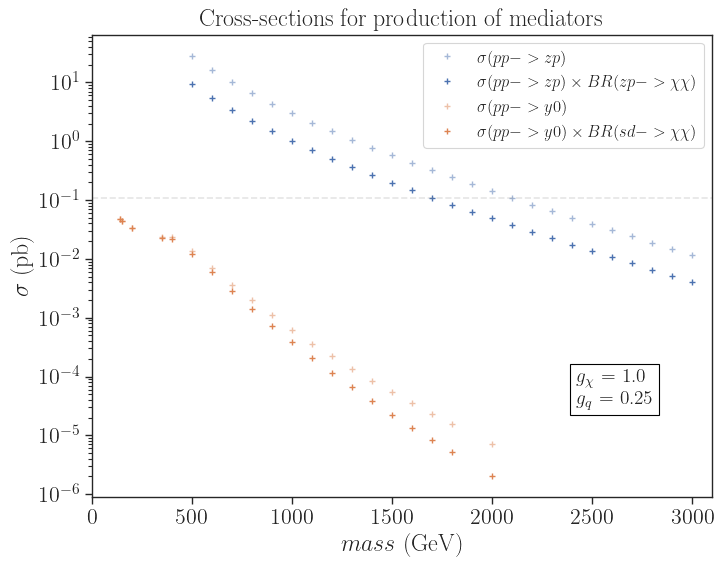

In [14]:
# plot cross-section
plt.figure(figsize=(8,6))
for label in pclFiles.keys():
    mass = np.array(dfModel['$m_{med}$'][dfModel['process'] == label])
    xsecs = np.array(dfModel['x-sec (pb)'][dfModel['process'] == label])
    plt.plot(mass, xsecs, color=colors[label], alpha=0.5, marker='+', linestyle='', label=r'$\sigma(%s)$' %(label))
    if label in ['pp->zp']:
        xsecsBR = xsecs*GammaZpChi
        plt.plot(mass, xsecsBR, color=colors[label], marker='+', linestyle='', 
                 label=r'$\sigma(%s) \times BR(zp -> \chi \chi)$' %(label))
    elif label in ['pp->y0']:
        xsecsBR = xsecs*GammaSdChi
        plt.plot(mass, xsecsBR, color=colors[label], marker='+', linestyle='', 
                 label=r'$\sigma(%s) \times BR(sd -> \chi \chi)$' %(label))

    
plt.hlines(0.11, xmin=0.0, xmax=3100, linestyles='--', alpha=0.2, color='gray')
plt.yscale('log')

plt.title('Cross-sections for production of mediators')
plt.xlabel(r'$mass$ (GeV)')
plt.ylabel(r'$\sigma$ (pb)')

plt.text(0.78,0.2,textstr,fontsize=14,bbox=dict(facecolor='none', edgecolor='black'),
         transform = plt.gca().transAxes)
plt.xlim(0.0, 3100)


plt.legend(fontsize=12, loc='upper right')
plt.show()